<a href="https://colab.research.google.com/github/HanifFaishalH/pbl_jawara/blob/main/Model_PCVK_Kel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mengambil Dataset Batik

In [ ]:
import pandas as pd
import os

# path folder dataset
source_data = '/content/drive/MyDrive/PBL/batik-dataset'

classes = os.listdir(source_data)

data_info = []

for kelas in classes:
    kelas_path = os.path.join(source_data, kelas)

    # Hitung jumlah file gambar
    jumlah_file = len([f for f in os.listdir(kelas_path)
                       if os.path.isfile(os.path.join(kelas_path, f))])

    data_info.append({
        "Kategori": kelas,
        "Jumlah Gambar": jumlah_file
    })

# Buat DataFrame informasi dataset
df = pd.DataFrame(data_info)

print(df)

  Kategori  Jumlah Gambar
0    Tulis             48
1      Cap             48


# Proses Augmentasi Dataset
- Horizonal Flip
- Vertikal Flip
- Zoom 50%

In [ ]:
import os
import shutil
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

source_data = '/content/drive/MyDrive/PBL/batik-dataset'
base_augmented_output = '/content/drive/MyDrive/PBL/batik-dataset-augmented'
ORIGINAL_IMAGES_PER_CLASS = 48

AUGMENTATION_CONFIGS = [
    {"name": "zoom", "datagen_params": {"zoom_range": [0.5, 1.0], "fill_mode": 'nearest'}},
    {"name": "vflip", "datagen_params": {"vertical_flip": True, "fill_mode": 'nearest'}},
    {"name": "hflip", "datagen_params": {"horizontal_flip": True, "fill_mode": 'nearest'}}
]

if not os.path.exists(base_augmented_output):
    os.makedirs(base_augmented_output)

print(f"Memulai proses augmentasi dari: {source_data}")

classes = os.listdir(source_data)
total_overall_final = 0

# Loop utama untuk setiap kelas
for class_name in classes:
    source_class_path = os.path.join(source_data, class_name)
    target_class_path = os.path.join(base_augmented_output, class_name)

    if not os.path.exists(target_class_path):
        os.makedirs(target_class_path)

    # Filter hanya file gambar
    image_files = [f for f in os.listdir(source_class_path)
                   if os.path.isfile(os.path.join(source_class_path, f))
                   and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"-> Melewati kelas '{class_name}': Tidak ditemukan gambar.")
        continue

    original_count = 0
    augmented_total_count = 0

    print(f"\nMemproses Kelas '{class_name}' ({len(image_files)} gambar asli)")

    for original_image_name in tqdm(image_files, desc=f"Augmentasi {class_name}"):
        original_image_path = os.path.join(source_class_path, original_image_name)

        # 1. SALIN FILE ASLI
        try:
            shutil.copy(original_image_path, os.path.join(target_class_path, original_image_name))
            original_count += 1
        except Exception as e:
            print(f"   - Gagal menyalin gambar asli '{original_image_name}'. Error: {e}")
            continue

        # 2. PROSES AUGMENTASI
        try:
            img = Image.open(original_image_path)
            x = np.asarray(img, dtype='float32')
            if x.ndim == 2:
                x = np.expand_dims(x, axis=-1)
            x = x.reshape((1,) + x.shape)

            for aug_config in AUGMENTATION_CONFIGS:
                aug_name = aug_config["name"]
                aug_params = aug_config["datagen_params"]

                datagen_discrete = ImageDataGenerator(**aug_params)

                for batch in datagen_discrete.flow(x, batch_size=1,
                                                 save_to_dir=target_class_path,
                                                 save_prefix=f'{aug_name}_{original_image_name.split(".")[0]}',
                                                 save_format='jpeg'):
                    augmented_total_count += 1
                    break

        except Exception as e:
            print(f"   - Gagal mengaugmentasi gambar '{original_image_name}'. Error: {e}")

    total_final = original_count + augmented_total_count
    total_overall_final += total_final

    print(f"Kelas '{class_name}' selesai diproses.")
    print(f"Total Gambar Asli (disalin ke folder akhir): {original_count}")
    print(f"Total Augmentasi yang Dibuat: {augmented_total_count} ({original_count} x 3)")
    print(f"TOTAL GAMBAR AKHIR PER KELAS: {total_final}")
    print("-" * 50)


print("\nProses augmentasi diskrit selesai!")
expected_per_class = ORIGINAL_IMAGES_PER_CLASS + (ORIGINAL_IMAGES_PER_CLASS * len(AUGMENTATION_CONFIGS))
print(f"SETIAP KELAS SEKARANG MENGANDUNG TOTAL {ORIGINAL_IMAGES_PER_CLASS} ASLI + {ORIGINAL_IMAGES_PER_CLASS * len(AUGMENTATION_CONFIGS)} AUGMENTED = {expected_per_class} GAMBAR.")

Memulai proses augmentasi dari: /content/drive/MyDrive/PBL/batik-dataset

Memproses Kelas 'Tulis' (48 gambar asli)


Augmentasi Tulis: 100%|██████████| 48/48 [05:43<00:00,  7.16s/it]


Kelas 'Tulis' selesai diproses.
Total Gambar Asli (disalin ke folder akhir): 48
Total Augmentasi yang Dibuat: 144 (48 x 3)
TOTAL GAMBAR AKHIR PER KELAS: 192
--------------------------------------------------

Memproses Kelas 'Cap' (48 gambar asli)


Augmentasi Cap: 100%|██████████| 48/48 [05:11<00:00,  6.48s/it]

Kelas 'Cap' selesai diproses.
Total Gambar Asli (disalin ke folder akhir): 48
Total Augmentasi yang Dibuat: 144 (48 x 3)
TOTAL GAMBAR AKHIR PER KELAS: 192
--------------------------------------------------

Proses augmentasi diskrit selesai!
SETIAP KELAS SEKARANG MENGANDUNG TOTAL 48 ASLI + 144 AUGMENTED = 192 GAMBAR.


# Preprocessing Data citra

Memulai proses preprocessing...

Memproses kelas 'Tulis' (336 gambar)


  0%|          | 0/336 [00:00<?, ?it/s]

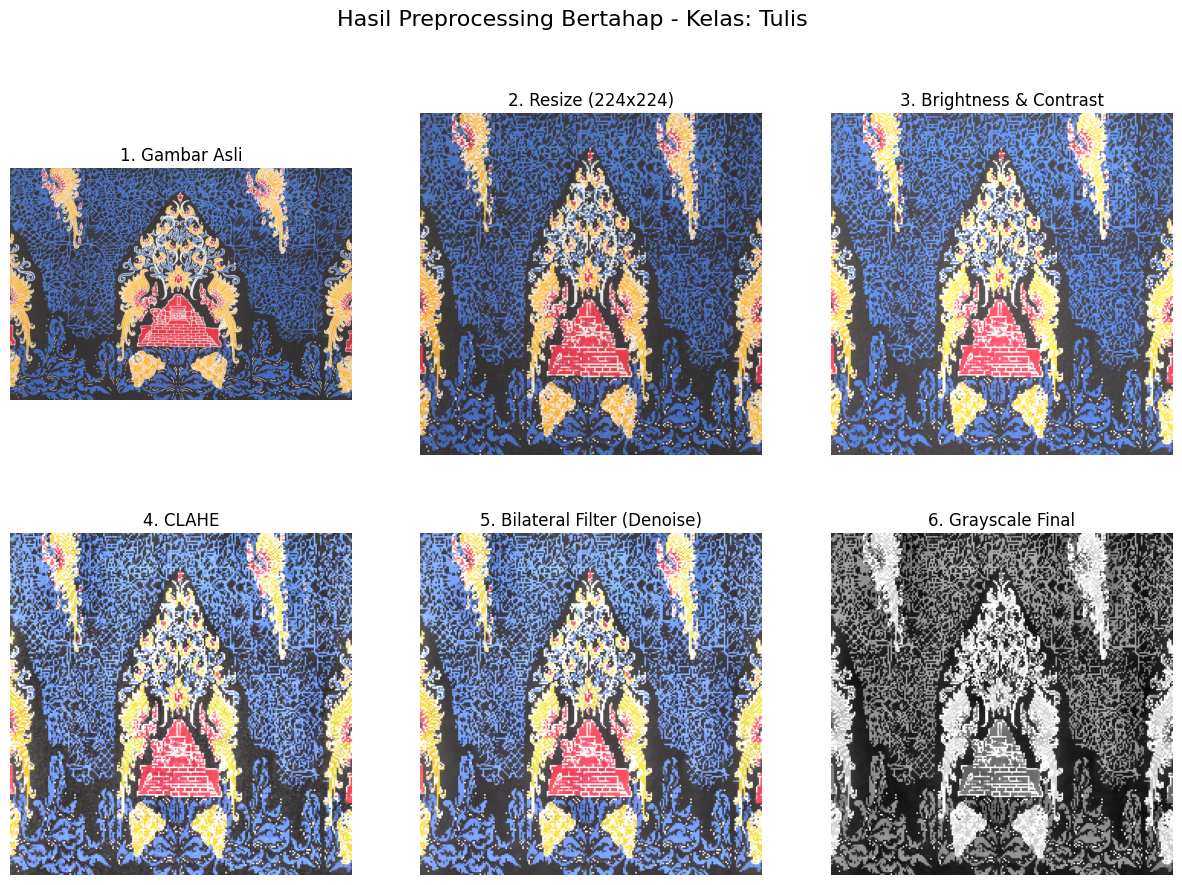

100%|██████████| 336/336 [01:25<00:00,  3.91it/s]


Memproses kelas 'Cap' (336 gambar)


  0%|          | 0/336 [00:00<?, ?it/s]

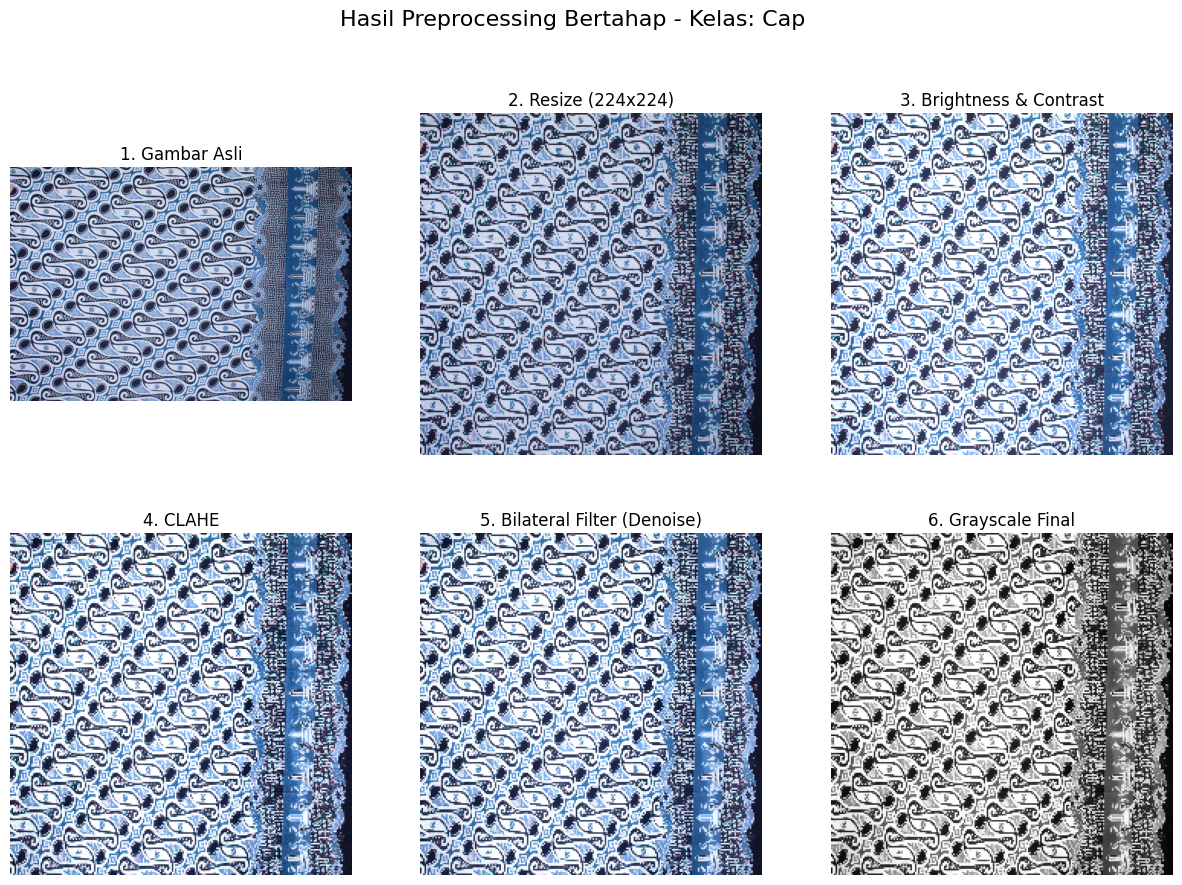

100%|██████████| 336/336 [01:24<00:00,  3.97it/s]


Preprocessing selesai! Semua gambar telah diproses dan divisualisasikan.


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

source_data = '/content/drive/MyDrive/PBL/batik-dataset-augmented'
preprocessed_output = "/content/drive/MyDrive/PBL/batik-augmented-preprocessed"

# Buat folder output jika belum ada
if not os.path.exists(preprocessed_output):
    os.makedirs(preprocessed_output)

TARGET_SIZE = (224, 224)  # Ukuran seragam

print("Memulai proses preprocessing...\n")

classes = os.listdir(source_data)

for class_name in classes:
    class_input_path = os.path.join(source_data, class_name)
    class_output_path = os.path.join(preprocessed_output, class_name)

    if not os.path.exists(class_output_path):
        os.makedirs(class_output_path)

    image_files = [
        f for f in os.listdir(class_input_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    print(f"Memproses kelas '{class_name}' ({len(image_files)} gambar)")

    sample_shown = False  # Tampilkan 1 gambar per kelas

    for img_name in tqdm(image_files):
        img_path = os.path.join(class_input_path, img_name)

        # --- Tahap 1: Baca asli ---
        original = cv2.imread(img_path)
        if original is None:
            continue

        original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

        # --- Tahap 2: Resize ---
        resized = cv2.resize(original, TARGET_SIZE)
        resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

        # --- Tahap 3: Brightness & Contrast ---
        alpha = 1.2   # contrast
        beta = 10     # brightness
        bright_contrast = cv2.convertScaleAbs(resized, alpha=alpha, beta=beta)
        bright_contrast_rgb = cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2RGB)

        # --- Tahap 4: CLAHE ---
        lab = cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2LAB)
        L, A, B = cv2.split(lab)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(L)

        lab_clahe = cv2.merge((cl, A, B))
        clahe_img = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB)

        # --- Tahap 5: Bilateral Filter ---
        bilateral = cv2.bilateralFilter(clahe_img, d=7, sigmaColor=50, sigmaSpace=50)
        bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

        # --- Tahap 6: Grayscale ---
        gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

        # ------------------------ TAMPILKAN SEMUA TAHAP ------------------------
        if not sample_shown:
            plt.figure(figsize=(15, 10))
            plt.suptitle(f"Hasil Preprocessing Bertahap - Kelas: {class_name}", fontsize=16)

            images = [
                (original_rgb, "1. Gambar Asli"),
                (resized_rgb, "2. Resize (224x224)"),
                (bright_contrast_rgb, "3. Brightness & Contrast"),
                (clahe_rgb, "4. CLAHE"),
                (bilateral_rgb, "5. Bilateral Filter (Denoise)"),
                (gray, "6. Grayscale Final")
            ]

            for i, (img_disp, title) in enumerate(images, 1):
                plt.subplot(2, 3, i)
                if len(img_disp.shape) == 2:
                    plt.imshow(img_disp, cmap='gray')
                else:
                    plt.imshow(img_disp)
                plt.title(title)
                plt.axis("off")

            plt.show()
            sample_shown = True
        # ------------------------------------------------------------------------

        # Simpan grayscale ke output
        output_path = os.path.join(class_output_path, img_name)
        cv2.imwrite(output_path, gray)

print("\nPreprocessing selesai! Semua gambar telah diproses dan divisualisasikan.")


#Ekstraksi fitur (GLCM, LBP, GLCM+LBP)

In [2]:
import cv2
import numpy as np
import os
from tqdm import tqdm

preprocessed_output = "/content/drive/MyDrive/PBL/batik-augmented-preprocessed"

images = []
labels = []

print(f"Memuat gambar dari: {preprocessed_output}\n")

classes = sorted(os.listdir(preprocessed_output))

for class_name in classes:
    class_path = os.path.join(preprocessed_output, class_name)
    if not os.path.isdir(class_path):
        continue

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Memproses kelas '{class_name}' ({len(image_files)} gambar)")

    for img_name in tqdm(image_files):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Load as grayscale as per preprocessing
        if img is not None:
            images.append(img)
            labels.append(class_name)

# Konversi list ke NumPy array
images_np = np.array(images)
labels_np = np.array(labels)

print("\nSelesai memuat gambar dan label.")
print(f"Total gambar dimuat: {len(images_np)}")
print(f"Shape dari array gambar: {images_np.shape}")
print(f"Shape dari array label: {labels_np.shape}")


Memuat gambar dari: /content/drive/MyDrive/PBL/batik-augmented-preprocessed

Memproses kelas 'Cap' (336 gambar)


100%|██████████| 336/336 [00:07<00:00, 45.21it/s] 


Memproses kelas 'Tulis' (336 gambar)


100%|██████████| 336/336 [00:07<00:00, 42.20it/s] 


Selesai memuat gambar dan label.
Total gambar dimuat: 672
Shape dari array gambar: (672, 224, 224)
Shape dari array label: (672,)


In [3]:
from skimage.feature import graycomatrix, graycoprops

# Menentukan jarak dan sudut untuk GLCM
distances = [1, 2, 3] # Jarak piksel
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4] # Sudut (0, 45, 90, 135 derajat)

# List untuk menyimpan fitur GLCM
glcdm_features = []

print("Memulai ekstraksi fitur GLCM...")

for i, image in tqdm(enumerate(images_np), total=len(images_np), desc="Ekstraksi GLCM"):
    # Menghitung GLCM
    # `levels` diatur ke 256 karena gambar di-load sebagai grayscale dengan nilai 0-255
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Menghitung properti GLCM
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()

    # Menggabungkan semua fitur menjadi satu array
    all_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    glcdm_features.append(all_features)

# Konversi list fitur ke NumPy array
glcdm_features_np = np.array(glcdm_features)

print("\nEkstraksi fitur GLCM selesai.")
print(f"Shape dari array fitur GLCM: {glcdm_features_np.shape}")
print(f"Shape dari array label: {labels_np.shape}")

Memulai ekstraksi fitur GLCM...


Ekstraksi GLCM: 100%|██████████| 672/672 [00:47<00:00, 14.28it/s]


Ekstraksi fitur GLCM selesai.
Shape dari array fitur GLCM: (672, 60)
Shape dari array label: (672,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

print("Memulai persiapan data untuk pelatihan model...")

# 1. Encoding label
le = LabelEncoder()
labels_encoded = le.fit_transform(labels_np)
print(f"Label asli: {np.unique(labels_np)}")
print(f"Label terenkripsi: {np.unique(labels_encoded)}")

# 2. Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    glcdm_features_np, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

# 3. Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData telah berhasil dienkripsi, dibagi, dan diskalakan.")
print(f"Shape X_train_scaled: {X_train_scaled.shape}")
print(f"Shape X_test_scaled: {X_test_scaled.shape}")


Memulai persiapan data untuk pelatihan model...
Label asli: ['Cap' 'Tulis']
Label terenkripsi: [0 1]

Shape X_train: (537, 60)
Shape X_test: (135, 60)
Shape y_train: (537,)
Shape y_test: (135,)

Data telah berhasil dienkripsi, dibagi, dan diskalakan.
Shape X_train_scaled: (537, 60)
Shape X_test_scaled: (135, 60)


Memulai pelatihan model klasifikasi SVM...
Model SVM berhasil dilatih.

Akurasi Model SVM: 0.9185

Laporan Klasifikasi:

              precision    recall  f1-score   support

         Cap       0.97      0.87      0.91        68
       Tulis       0.88      0.97      0.92        67

    accuracy                           0.92       135
   macro avg       0.92      0.92      0.92       135
weighted avg       0.92      0.92      0.92       135


Matriks Konfusi:


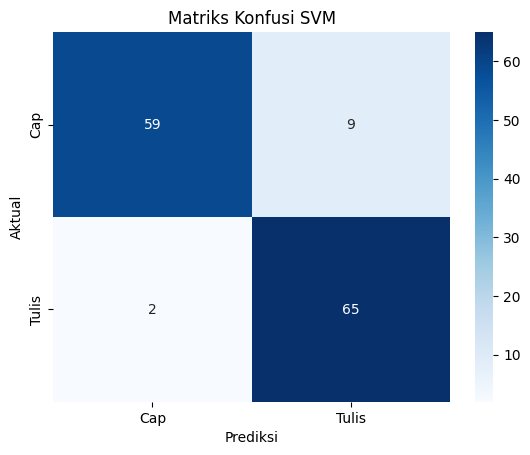

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Memulai pelatihan model klasifikasi SVM...")

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear', random_state=42) # Menggunakan kernel linear sebagai contoh
svm_model.fit(X_train_scaled, y_train)

print("Model SVM berhasil dilatih.")

# Prediksi pada data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAkurasi Model SVM: {accuracy:.4f}")
print("\nLaporan Klasifikasi:\n")
print(report)

print("\nMatriks Konfusi:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi SVM')
plt.show()


In [6]:
from skimage.feature import local_binary_pattern
import numpy as np
from tqdm import tqdm

print("Memulai ekstraksi fitur LBP...")

# 2. Define LBP parameters
radius = 1
n_points = 8 * radius

# 3. Calculate number of bins for LBP histogram
n_bins = n_points + 2  # For uniform LBP patterns

# 4. Initialize an empty list for LBP features
lbp_features = []

# 5. Iterate through each image in the images_np array
for i, image in tqdm(enumerate(images_np), total=len(images_np), desc="Ekstraksi LBP"):
    # Convert image to uint8 if it's not already (LBP expects integer types)
    image = image.astype(np.uint8)

    # a. Compute the Local Binary Pattern image
    lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

    # b. Calculate the histogram of the LBP image
    # Ensure range covers all possible LBP values (0 to n_points + 1 for uniform)
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins, range=(0, n_bins))

    # Normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7) # Add a small epsilon to prevent division by zero

    # c. Append the normalized LBP histogram
    lbp_features.append(hist)

# 6. Convert the lbp_features list into a NumPy array
lbp_features_np = np.array(lbp_features)

print("\nEkstraksi fitur LBP selesai.")
print(f"Shape dari array fitur LBP: {lbp_features_np.shape}")
print(f"Shape dari array label: {labels_np.shape}")

Memulai ekstraksi fitur LBP...


Ekstraksi LBP: 100%|██████████| 672/672 [00:18<00:00, 36.34it/s]


Ekstraksi fitur LBP selesai.
Shape dari array fitur LBP: (672, 10)
Shape dari array label: (672,)


In [7]:
print("Menggabungkan fitur GLCM dan LBP...")

# Menggabungkan fitur GLCM dan LBP
X_combined = np.hstack((glcdm_features_np, lbp_features_np))

print("Fitur GLCM dan LBP berhasil digabungkan.")
print(f"Shape dari array fitur gabungan: {X_combined.shape}")

Menggabungkan fitur GLCM dan LBP...
Fitur GLCM dan LBP berhasil digabungkan.
Shape dari array fitur gabungan: (672, 70)


In [8]:
print("Memulai persiapan data gabungan untuk pelatihan model...")

# 1. Encoding label (sudah dilakukan, menggunakan labels_encoded yang sama)

# 2. Pembagian data menjadi training dan testing set untuk fitur gabungan
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"\nShape X_train_combined: {X_train_combined.shape}")
print(f"Shape X_test_combined: {X_test_combined.shape}")
print(f"Shape y_train_combined: {y_train_combined.shape}")
print(f"Shape y_test_combined: {y_test_combined.shape}")

# 3. Scaling fitur gabungan
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

print("\nData gabungan telah berhasil dibagi dan diskalakan.")
print(f"Shape X_train_combined_scaled: {X_train_combined_scaled.shape}")
print(f"Shape X_test_combined_scaled: {X_test_combined_scaled.shape}")

Memulai persiapan data gabungan untuk pelatihan model...

Shape X_train_combined: (537, 70)
Shape X_test_combined: (135, 70)
Shape y_train_combined: (537,)
Shape y_test_combined: (135,)

Data gabungan telah berhasil dibagi dan diskalakan.
Shape X_train_combined_scaled: (537, 70)
Shape X_test_combined_scaled: (135, 70)


Memulai pelatihan model klasifikasi SVM dengan fitur gabungan...
Model SVM dengan fitur gabungan berhasil dilatih.

Akurasi Model SVM dengan Fitur Gabungan: 0.9852

Laporan Klasifikasi dengan Fitur Gabungan:

              precision    recall  f1-score   support

         Cap       0.99      0.99      0.99        68
       Tulis       0.99      0.99      0.99        67

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135


Matriks Konfusi dengan Fitur Gabungan:


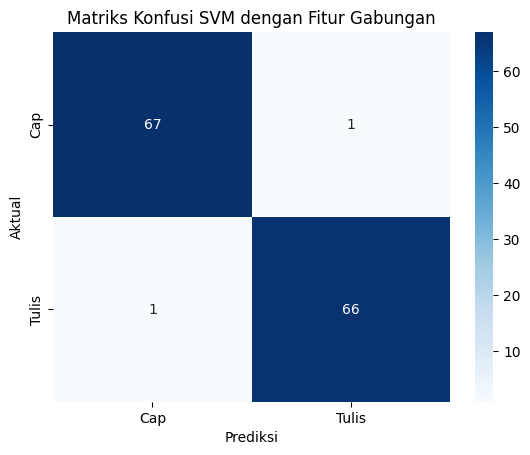

In [9]:
print("Memulai pelatihan model klasifikasi SVM dengan fitur gabungan...")

# Inisialisasi dan latih model SVM dengan fitur gabungan
svm_model_combined = SVC(kernel='linear', random_state=42) # Menggunakan kernel linear sebagai contoh
svm_model_combined.fit(X_train_combined_scaled, y_train_combined)

print("Model SVM dengan fitur gabungan berhasil dilatih.")

# Prediksi pada data uji
y_pred_combined = svm_model_combined.predict(X_test_combined_scaled)

# Evaluasi model
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
report_combined = classification_report(y_test_combined, y_pred_combined, target_names=le.classes_)
conf_matrix_combined = confusion_matrix(y_test_combined, y_pred_combined)

print(f"\nAkurasi Model SVM dengan Fitur Gabungan: {accuracy_combined:.4f}")
print("\nLaporan Klasifikasi dengan Fitur Gabungan:\n")
print(report_combined)

print("\nMatriks Konfusi dengan Fitur Gabungan:")
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi SVM dengan Fitur Gabungan')
plt.show()